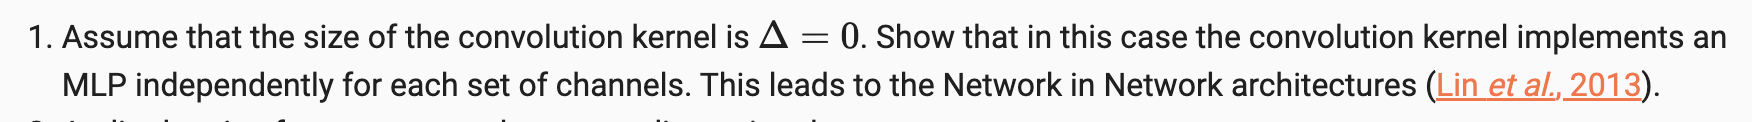

Let's look at the multi-channel convolution formula from your text:$$[\mathsf{H}]_{i,j,d} = \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} \sum_c [\mathsf{V}]_{a, b, c, d} [\mathsf{X}]_{i+a, j+b, c}$$If we set $\Delta = 0$, the spatial offsets $a$ and $b$ can only be $0$. The summations over $a$ and $b$ disappear, leaving us with:$$[\mathsf{H}]_{i,j,d} = \sum_c [\mathsf{V}]_{0, 0, c, d} [\mathsf{X}]_{i, j, c}$$Since the spatial indices $(0,0)$ in the kernel $\mathsf{V}$ are now constant, we can simplify the kernel to a weight matrix $\mathbf{W}$ where $W_{c,d} = V_{0,0,c,d}$. The formula becomes:$$[\mathsf{H}]_{i,j,d} = \sum_c W_{c,d} [\mathsf{X}]_{i, j, c}$$

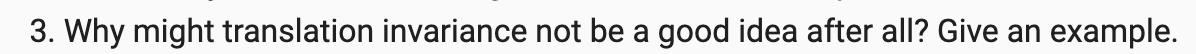

The most iconic example of why translation invariance can fail is the **"Scrambled Face" (or Picasso Face) Problem.**

Imagine you have a CNN trained to recognize human faces. A human face is defined not just by the *presence* of parts, but by their **spatial relationship**: two eyes above a nose, which is above a mouth.

If you take an image of a face and "scramble" it—cutting out the eyes, nose, and mouth and pasting them in random, anatomically impossible positions—a standard, highly invariant CNN will often still classify it as a **"Face" with nearly 100% confidence.**

* **The "Eye" Filter:** Fires correctly because it found an eye.
* **The "Mouth" Filter:** Fires correctly because it found a mouth.
* **The Pooling Layers:** Since they are designed to be **invariant**, they effectively report: *"I found an eye somewhere in this area, and a mouth somewhere in that area."* Because the network is so good at ignoring *where* things are (translation invariance), it fails to realize that the *arrangement* is wrong. It sees a "bag of features" instead of a structured object.

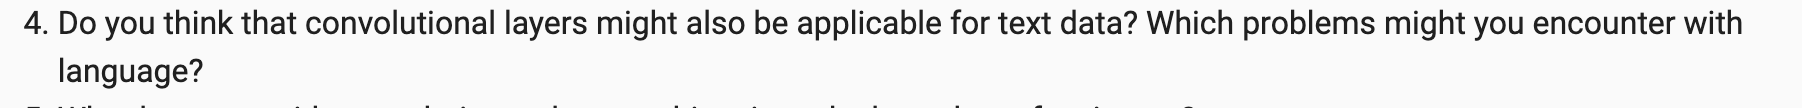

In NLP, we treat text like a **1D "image"** where the "width" is the length of the sentence and the "channels" are the dimensions of the word embeddings (e.g., a 300-dimensional vector for each word).

In text, a convolutional kernel acts as a **sliding n-gram detector**.

* A  kernel slides over a sentence, looking at 3 words at a time across all 300 embedding dimensions.
* It learns to recognize local patterns like "not good" (negative sentiment) or "very fast" (positive intensity).
* **Translation Invariance** is helpful here: "I hate this movie" and "This movie, I hate" both contain the phrase "I hate," and the CNN will find it regardless of where it appears in the sentence.

While CNNs are fast and efficient for text, they face three major hurdles compared to computer vision:

1. Fixed "Receptive Field" (The Window Problem)**

In an image, a  kernel captures a lot of local context. In language, meaning often depends on words very far apart.

* **Example:** "The **movie** I saw yesterday with my friends at the mall was **boring**."
* A small CNN kernel might see "movie I saw" or "mall was boring," but it struggles to link "movie" and "boring" directly because they are separated by many words. This is why **Transformers** (using Self-Attention) eventually took over—they can "see" the whole sentence at once.

2. Lack of Global Structure**

As we discussed with the **"Picasso Face"** problem, CNNs are a "bag of features." They are great at detecting *if* a word exists, but they are weaker at understanding the complex **syntax** or **logical flow** of a long paragraph. Shuffling sentences might not change a CNN's prediction much, even if it changes the entire meaning for a human.

3. Discrete vs. Continuous Data**

Images are continuous (changing a pixel's color slightly doesn't change the object). Language is **discrete**. Changing one word (e.g., "good" to "bad") or even one character can completely flip the meaning. CNNs, which rely on smooth gradients and weighted averages, sometimes struggle with the "brittleness" of linguistic meaning.
